In [205]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
x = np.random.randint(2, size = 50)   # Binary information as stream of bits (binary signal 0 or 1)
N = len(x)
Tb = 0.0001;    # Data rate = 1MHz i.e., bit period (second)
nb = 100;       # Digital signal per bit 

t1 = Tb*np.arange(0,N,1/nb)
t2 = Tb*np.arange(0,1,1/nb)
br = 1/Tb;       # Bit rate
f1 = 5*br
f2 = 5.35*br

# 1. FSK Modulation

## 1.1. Generate and plot the carrier signal

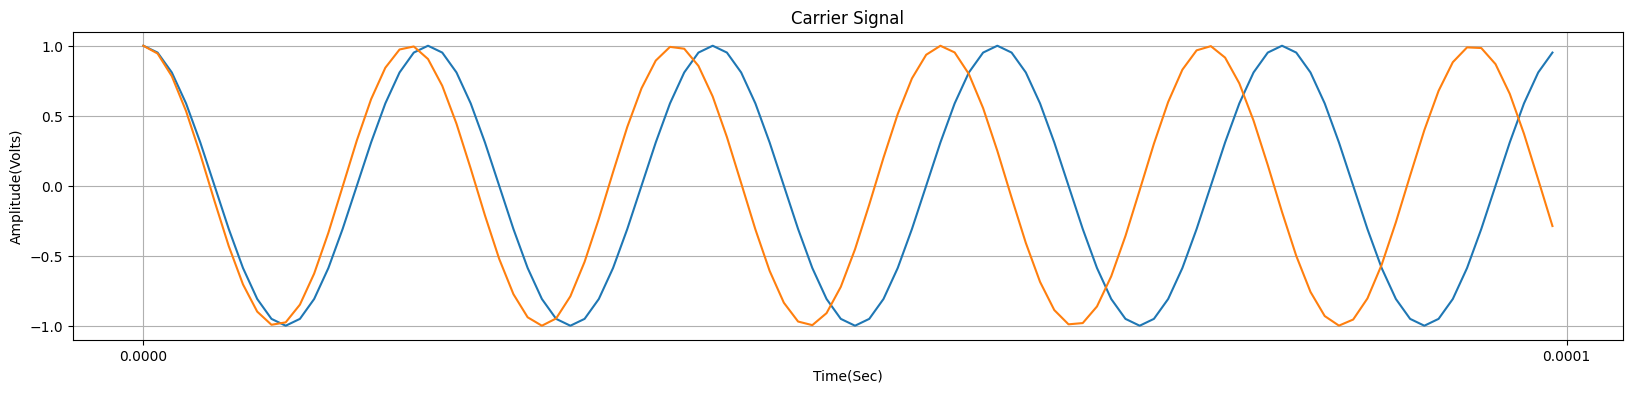

In [207]:

c1 = np.cos(2*np.pi*f1*t2);           # carrier signal for binary value '1'
c2 = np.cos(2*np.pi*f2*t2);           # carrier signal for binary value '0'
# plot the carrier signal
plt.figure(figsize=(20,4))
plt.plot(t2,c1)
plt.plot(t2,c2)
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude(Volts)')
plt.xticks(np.arange(0,Tb+Tb,Tb))
plt.yticks(np.arange(-1,1.5,0.5))
plt.grid(True)
plt.title('Carrier Signal')
plt.show()



## 1.2. Generate and plot the binary data sequence

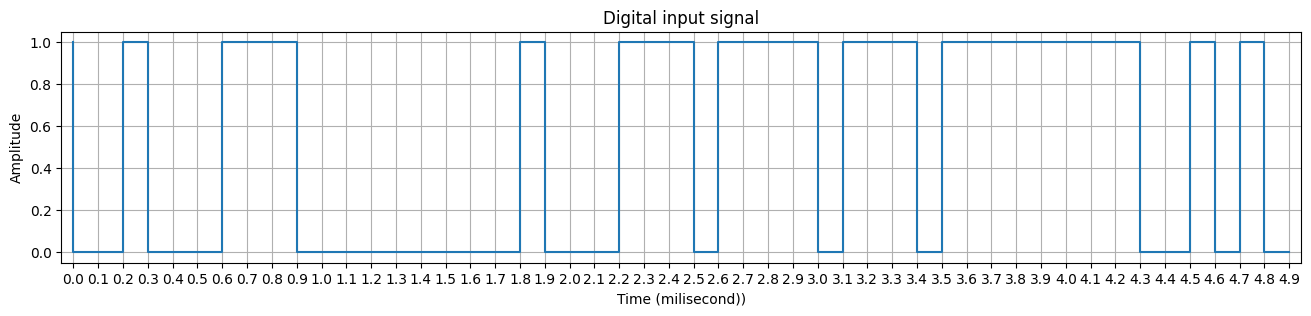

In [208]:
digit = np.empty(shape=0, dtype=int); 
for n in range(0,N,1):
    if int(x[n]) == 1:
        digit =np.append(digit,np.ones(nb))
    else:
        digit =np.append(digit,np.zeros(nb))

# plt.figure(figsize=(12,4))
# plt.plot(t1,digit)
# plt.grid(True)
# plt.xticks(np.arange(0,Tb*N+Tb,Tb))
# plt.yticks(np.arange(0,1.5,0.5))
# plt.xlabel('Time (second)')
# plt.ylabel('Amplitude(Volts)')
# plt.title('Digital Input Signal')
# plt.show()
plt.figure(figsize = (16, 3))   
plt.title('Digital input signal')
plt.xticks(1000*np.arange(0,Tb*N,Tb))
plt.xlabel('Time (milisecond))')
plt.ylabel('Amplitude')
plt.step(1000*np.arange(0,Tb*N,Tb), x)
plt.grid(True)
plt.margins(x=0.01, y=0.05)
plt.show()




## 1.3. Perform FSK modulation and plot the FSK modulated signal

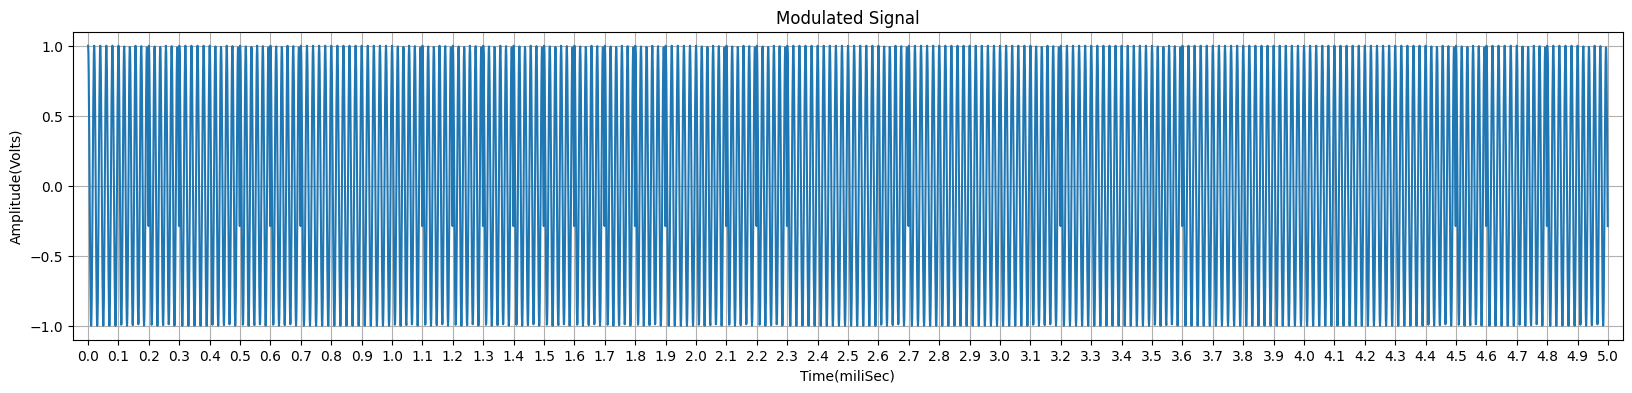

In [209]:
mod = np.empty(shape=0, dtype=int)
for i in range(0,N,1):
    if int(x[i]) == 1:
        y = c1   # Modulation signal with carrier signal 1
    else:
        y = c2   # Modulation signal with carrier signal 2
    mod = np.append(mod,y)
# print('Modulated Signal = ',mod)

plt.figure(figsize=(20,4))
plt.plot(1000*t1,mod)
plt.xlabel('Time(miliSec)')
plt.ylabel('Amplitude(Volts)')
plt.xticks(1000*np.arange(0,Tb*N+Tb,Tb))
plt.yticks(np.arange(-1,1.5,0.5))
plt.margins(x=0.01, y=0.05)
plt.grid(True)
plt.title('Modulated Signal')
plt.show()


# 2. FSK Demodulation

## Demodulated binary data

Binary information at Receiver :
[1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 1 0 1 0]


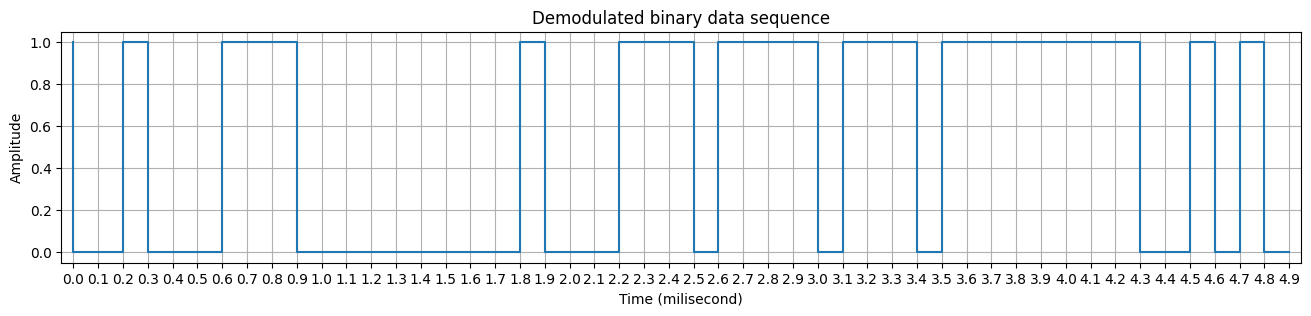

In [210]:
s = len(t2)
demod=np.empty(shape=0, dtype=int)
for n in range(s,len(mod)+s,s):
    # c=np.cos(2*np.pi*f*t2)
    # mm=np.multiply(c,mod[n-s:n])
    # z=np.trapz(mm,t2)
    # zz=np.round((2*z/Tb))                                     
    # if(zz<1/2):
    #     demod = np.append(demod,0)
    # else:
    #     demod = np.append(demod,1)
    c1=np.cos(2*np.pi*f1*t2)
    c2=np.cos(2*np.pi*f2*t2)
    mm1=np.multiply(c1,mod[n-s:n])
    mm2=np.multiply(c2,mod[n-s:n])
    z1=np.trapz(mm1,t2)
    z2=np.trapz(mm2,t2)
    zz1=np.round((2*z1/Tb))
    zz2=np.round((2*z2/Tb))
    if(zz1<1/2):
        demod = np.append(demod,0)
    else:
        demod = np.append(demod,1)
        
print('Binary information at Receiver :')
print(demod)

digit = np.empty(shape=0, dtype=int); 
for n in range(0,len(demod),1):
    if demod[n] == 1:
        digit = np.append(digit,np.ones(nb))
    else:
        digit = np.append(digit,np.zeros(nb))
# plt.figure(figsize=(12,4))
# plt.plot(t1,digit)
# plt.grid(True)
# plt.xticks(np.arange(0,Tb*N+Tb,Tb))
# plt.yticks(np.arange(0,1.5,0.5))
# plt.xlabel('Time (second)')
# plt.ylabel('Amplitude(Volts)')
# plt.title('Received information as digital signal after binary FSK demodulation')
plt.figure(figsize = (16, 3))   
plt.title('Demodulated binary data sequence')
plt.xticks(1000*np.arange(0,Tb*N,Tb))
plt.xlabel('Time (milisecond)')
plt.ylabel('Amplitude')
plt.step(1000*np.arange(0,Tb*N,Tb), demod)
plt.margins(x=0.01, y=0.05)
plt.grid(True)
plt.show()


# 3. PSK modulation/demodulation under the effects of Gaussian noise

In [211]:
from numpy import sum,isrealobj,sqrt
from numpy.random import standard_normal

def awgn(s,SNRdB,L=1):
    """
    AWGN channel
    Add AWGN noise to input signal. The function adds AWGN noise vector to signal 's' to generate a resulting signal vector 'r' of specified SNR in dB. It also
    returns the noise vector 'n' that is added to the signal 's' and the power spectral density N0 of noise added
    Parameters:
        s : input/transmitted signal vector
        SNRdB : desired signal to noise ratio (expressed in dB) for the received signal
        L : oversampling factor (applicable for waveform simulation) default L = 1.
    Returns:
        r : received signal vector (r=s+n)
"""
    gamma = 10**(SNRdB/10) #SNR to linear scale
    if s.ndim==1:# if s is single dimensional vector
        P=L*sum(abs(s)**2)/len(s) #Actual power in the vector
    else: # multi-dimensional signals like MFSK
        P=L*sum(sum(abs(s)**2))/len(s) # if s is a matrix [MxN]
    N0=P/gamma # Find the noise spectral density
    if isrealobj(s):# check if input is real/complex object type
        n = sqrt(N0/2)*standard_normal(s.shape) # computed noise
    else:
        n = sqrt(N0/2)*(standard_normal(s.shape)+1j*standard_normal(s.shape))
    r = s + n # received signal
    return r

## PSK Modulation with AWGN

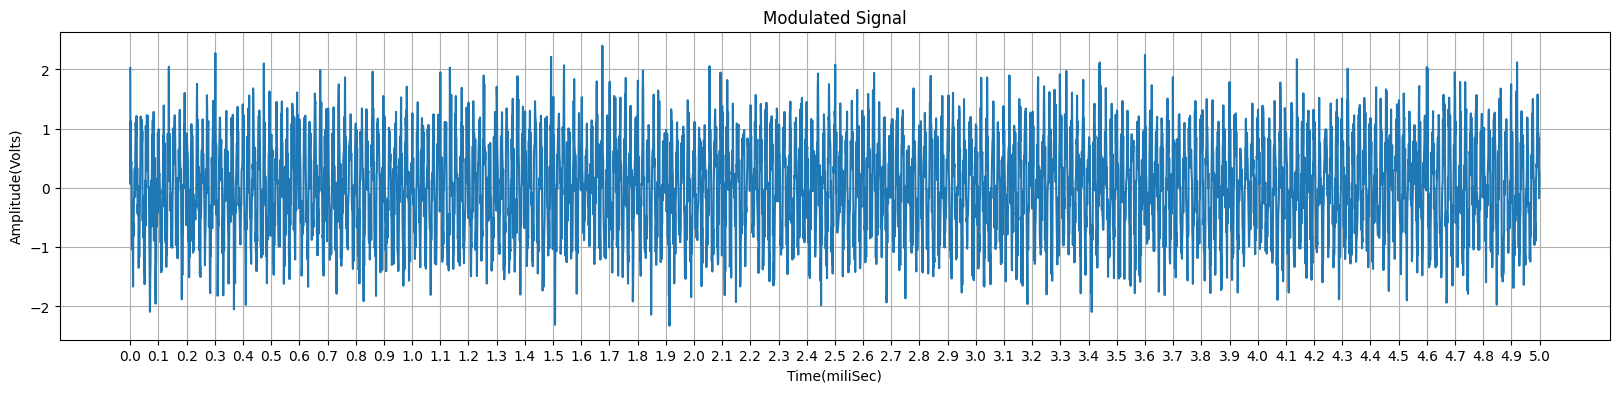

In [212]:
noise_mod = awgn(mod, 1) # AWGN noise with SNR = 10dB
plt.figure(figsize=(20,4))
plt.plot(1000*t1,noise_mod)
plt.xlabel('Time(miliSec)')
plt.ylabel('Amplitude(Volts)')
plt.xticks(1000*np.arange(0,Tb*N+Tb,Tb))
# plt.yticks(np.arange(-1,1.5,0.5))
plt.grid(True)
plt.title('Modulated Signal')
plt.show()

In [213]:
s = len(t2)
mn2=np.empty(shape=0, dtype=int)
for n in range(s,len(noise_mod)+s,s):
    t5=Tb*np.arange(0, 1, 1/nb)  # Time period
    # c3=np.cos(2*np.pi*f*t5)   
    # t1 = Tb*np.arange(0,N,1/nb)                                    # carrier signal
    c31=np.cos(2*np.pi*f1*t5)                                       # carrier signal
    c32=np.cos(2*np.pi*f2*t5)                                       # carrier signal    
    # mm1=np.multiply(c,noise_mod[n-s:n])
    mm1=np.multiply(c31,noise_mod[n-s:n])
    mm2=np.multiply(c32,noise_mod[n-s:n])
    z1=np.trapz(mm1,t5)                                            # integration
    z2=np.trapz(mm2,t5)                                            # integration

    
    if(np.round(2*z1/Tb)<1/2):                                
        mn2 = np.append(mn2,0)                                  
    else:
        mn2 = np.append(mn2,1)
print('Binary information at Receiver :')
print(mn2)

Binary information at Receiver :
[1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 1 0 1 0]


In [214]:
# //calculate bit error probability
error = 0
for i in range(0,len(mn2)):
    if mn2[i] != x[i]:
        error = error + 1
print('Bit Error Probability = ',error/len(mn2)*100, '%')




Bit Error Probability =  2.0 %
